In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import pylab as pl

In [6]:
cd C:\Users\hchoi30\Desktop\HW2

C:\Users\hchoi30\Desktop\HW2


In [9]:
Data = pd.read_csv('book1.csv')
Data

,Unnamed: 0,DOC1,DOC2,DOC3,DOC4,DOC5,DOC6,DOC7,DOC8,DOC9,DOC10
0,Term1,0,5,3,1,0,2,2,3,0,1
1,Term2,3,0,0,8,1,0,5,3,0,0
2,Term3,1,0,4,0,0,2,0,0,3,5
3,Term4,0,0,3,3,0,0,3,2,3,0
4,Term5,0,3,4,0,0,0,0,0,3,2
5,Term6,2,0,0,1,5,4,1,0,0,4
6,Term7,1,0,0,4,4,0,4,1,0,0
7,Term8,0,2,5,0,2,1,2,3,0,2


In [10]:
# Let's remove the column containing the terms
TD = Data.ix[:,1:]
TD

,DOC1,DOC2,DOC3,DOC4,DOC5,DOC6,DOC7,DOC8,DOC9,DOC10
0,0,5,3,1,0,2,2,3,0,1
1,3,0,0,8,1,0,5,3,0,0
2,1,0,4,0,0,2,0,0,3,5
3,0,0,3,3,0,0,3,2,3,0
4,0,3,4,0,0,0,0,0,3,2
5,2,0,0,1,5,4,1,0,0,4
6,1,0,0,4,4,0,4,1,0,0
7,0,2,5,0,2,1,2,3,0,2


In [11]:
terms = Data.ix[:,0]
terms

0    Term1
1    Term2
2    Term3
3    Term4
4    Term5
5    Term6
6    Term7
7    Term8
Name: Unnamed: 0, dtype: object

In [12]:
#Transposing the TD matrix
DT = TD.T
DT

,0,1,2,3,4,5,6,7
DOC1,0,3,1,0,0,2,1,0
DOC2,5,0,0,0,3,0,0,2
DOC3,3,0,4,3,4,0,0,5
DOC4,1,8,0,3,0,1,4,0
DOC5,0,1,0,0,0,5,4,2
DOC6,2,0,2,0,0,4,0,1
DOC7,2,5,0,3,0,1,4,2
DOC8,3,3,0,2,0,0,1,3
DOC9,0,0,3,3,3,0,0,0
DOC10,1,0,5,0,2,4,0,2


In [13]:
DT.shape

(10, 8)

In [14]:
numTerms=DT.shape[1]
NDocs = DT.shape[0]

In [15]:
print numTerms
print NDocs

8
10


In [16]:
termFreqs = TD.sum(axis=1)
print termFreqs

0    17
1    20
2    15
3    14
4    12
5    17
6    14
7    17
dtype: int64


In [17]:
dictTF = {}
for i in range(numTerms):
               dictTF[terms[i]] = termFreqs[i]
print sorted(dictTF.items())
sortedTF = sorted(dictTF.values(), reverse=True)
print sortedTF

[('Term1', 17), ('Term2', 20), ('Term3', 15), ('Term4', 14), ('Term5', 12), ('Term6', 17), ('Term7', 14), ('Term8', 17)]
[20, 17, 17, 17, 15, 14, 14, 12]


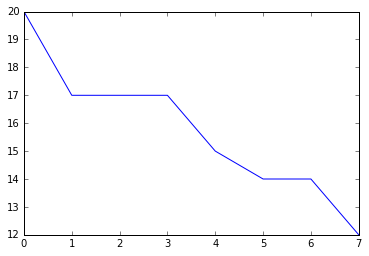

In [18]:
import matplotlib.pyplot as plt
plt.plot(sortedTF)
plt.show()

In [19]:
#Next, we will transform the data to TFxIDF weights:
# Find doucment frequencies for each term
DF = np.array([(TD!=0).sum(1)]).T
# could also say DF = np.array([(DT!=0).sum(0)])

print DF

[[7]
 [5]
 [5]
 [5]
 [4]
 [6]
 [5]
 [7]]


In [20]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print NMatrix

[[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [21]:
# Convert each entry into IDF values
# Note that IDF is only a function of the term, so all columns will be identical.
IDF = np.log2(np.divide(NMatrix, DF))

In [22]:
print IDF

[[ 0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51]
 [ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.  ]
 [ 1.32  1.32  1.32  1.32  1.32  1.32  1.32  1.32  1.32  1.32]
 [ 0.74  0.74  0.74  0.74  0.74  0.74  0.74  0.74  0.74  0.74]
 [ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.  ]
 [ 0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51]]


In [23]:
IDF.shape

(8L, 10L)

In [24]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TD * IDF

In [25]:
pd.set_option("display.precision", 2)

TD_tfidf

,DOC1,DOC2,DOC3,DOC4,DOC5,DOC6,DOC7,DOC8,DOC9,DOC10
0,0.00,2.57,1.54,0.51,0.00,1.03,1.03,1.54,0.00,0.51
1,3.00,0.00,0.00,8.00,1.00,0.00,5.00,3.00,0.00,0.00
2,1.00,0.00,4.00,0.00,0.00,2.00,0.00,0.00,3.00,5.00
3,0.00,0.00,3.00,3.00,0.00,0.00,3.00,2.00,3.00,0.00
4,0.00,3.97,5.29,0.00,0.00,0.00,0.00,0.00,3.97,2.64
5,1.47,0.00,0.00,0.74,3.68,2.95,0.74,0.00,0.00,2.95
6,1.00,0.00,0.00,4.00,4.00,0.00,4.00,1.00,0.00,0.00
7,0.00,1.03,2.57,0.00,1.03,0.51,1.03,1.54,0.00,1.03


In [26]:
TD_tfidf.T

,0,1,2,3,4,5,6,7
DOC1,0.00,3.0,1.0,0.0,0.00,1.47,1.0,0.00
DOC2,2.57,0.0,0.0,0.0,3.97,0.00,0.0,1.03
DOC3,1.54,0.0,4.0,3.0,5.29,0.00,0.0,2.57
DOC4,0.51,8.0,0.0,3.0,0.00,0.74,4.0,0.00
DOC5,0.00,1.0,0.0,0.0,0.00,3.68,4.0,1.03
DOC6,1.03,0.0,2.0,0.0,0.00,2.95,0.0,0.51
DOC7,1.03,5.0,0.0,3.0,0.00,0.74,4.0,1.03
DOC8,1.54,3.0,0.0,2.0,0.00,0.00,1.0,1.54
DOC9,0.00,0.0,3.0,3.0,3.97,0.00,0.0,0.00
DOC10,0.51,0.0,5.0,0.0,2.64,2.95,0.0,1.03


In [28]:
a = pd.read_csv('book2.csv')
a

,Unnamed: 0,DOC1,DOC2,DOC3,DOC4,DOC5,DOC6,DOC7,DOC8,DOC9,DOC10,Query
0,A,0,5,3,0,0,2,3,0,0,0,2
1,B,3,5,0,7,1,0,5,3,0,5,1
2,C,4,0,4,0,0,2,3,0,3,0,1
3,D,0,0,3,3,0,0,4,0,3,0,0
4,E,0,4,4,2,0,0,0,0,3,0,2
5,F,2,0,0,0,5,4,0,4,0,4,0
6,G,4,4,0,4,4,0,4,4,0,4,3
7,H,0,3,5,3,2,1,2,2,1,2,0


In [29]:
aTD = a.ix[:,1:]
aterms = a.ix[:,0]
#Transposing the TD matrix
aDT = aTD.T
anumTerms=aDT.shape[1]
aNDocs = aDT.shape[0]
atermFreqs = aTD.sum(axis=1)

In [30]:
aDF = np.array([(aTD!=0).sum(1)]).T
aNMatrix=np.ones(np.shape(aTD), dtype=float)*aNDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
# Note that IDF is only a function of the term, so all columns will be identical.
aIDF = np.log2(np.divide(aNMatrix, aDF))

In [31]:
aIDF

array([[ 1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14],
       [ 0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46],
       [ 0.87,  0.87,  0.87,  0.87,  0.87,  0.87,  0.87,  0.87,  0.87,  0.87,  0.87],
       [ 1.46,  1.46,  1.46,  1.46,  1.46,  1.46,  1.46,  1.46,  1.46,  1.46,  1.46],
       [ 1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14],
       [ 1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14,  1.14],
       [ 0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46,  0.46],
       [ 0.29,  0.29,  0.29,  0.29,  0.29,  0.29,  0.29,  0.29,  0.29,  0.29,  0.29]])

In [32]:
aTD

,DOC1,DOC2,DOC3,DOC4,DOC5,DOC6,DOC7,DOC8,DOC9,DOC10,Query
0,0,5,3,0,0,2,3,0,0,0,2
1,3,5,0,7,1,0,5,3,0,5,1
2,4,0,4,0,0,2,3,0,3,0,1
3,0,0,3,3,0,0,4,0,3,0,0
4,0,4,4,2,0,0,0,0,3,0,2
5,2,0,0,0,5,4,0,4,0,4,0
6,4,4,0,4,4,0,4,4,0,4,3
7,0,3,5,3,2,1,2,2,1,2,0


In [33]:
# Finally compute the TFxIDF values for each document-term entry
aTD_tfidf = aTD * aIDF

In [34]:
pd.set_option("display.precision", 2)

aTD_tfidf

,DOC1,DOC2,DOC3,DOC4,DOC5,DOC6,DOC7,DOC8,DOC9,DOC10,Query
0,0.00,5.69,3.41,0.00,0.00,2.28,3.41,0.00,0.00,0.00,2.28
1,1.38,2.30,0.00,3.22,0.46,0.00,2.30,1.38,0.00,2.30,0.46
2,3.50,0.00,3.50,0.00,0.00,1.75,2.62,0.00,2.62,0.00,0.87
3,0.00,0.00,4.38,4.38,0.00,0.00,5.84,0.00,4.38,0.00,0.00
4,0.00,4.55,4.55,2.28,0.00,0.00,0.00,0.00,3.41,0.00,2.28
5,2.28,0.00,0.00,0.00,5.69,4.55,0.00,4.55,0.00,4.55,0.00
6,1.84,1.84,0.00,1.84,1.84,0.00,1.84,1.84,0.00,1.84,1.38
7,0.00,0.87,1.45,0.87,0.58,0.29,0.58,0.58,0.29,0.58,0.00


In [35]:
aTD_tfidf.T

,0,1,2,3,4,5,6,7
DOC1,0.00,1.38,3.50,0.00,0.00,2.28,1.84,0.00
DOC2,5.69,2.30,0.00,0.00,4.55,0.00,1.84,0.87
DOC3,3.41,0.00,3.50,4.38,4.55,0.00,0.00,1.45
DOC4,0.00,3.22,0.00,4.38,2.28,0.00,1.84,0.87
DOC5,0.00,0.46,0.00,0.00,0.00,5.69,1.84,0.58
DOC6,2.28,0.00,1.75,0.00,0.00,4.55,0.00,0.29
DOC7,3.41,2.30,2.62,5.84,0.00,0.00,1.84,0.58
DOC8,0.00,1.38,0.00,0.00,0.00,4.55,1.84,0.58
DOC9,0.00,0.00,2.62,4.38,3.41,0.00,0.00,0.29
DOC10,0.00,2.30,0.00,0.00,0.00,4.55,1.84,0.58
